In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import sys, os
sys.dont_write_bytecode = True

import warnings
warnings.filterwarnings('ignore')

PATH = 'plot_data_python/png'
os.makedirs(PATH, exist_ok=True)

In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.family'] = 'Hiragino sans'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 2
plt.rcParams["legend.markerscale"] = 2
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams.update({'mathtext.default':  'regular' })

In [3]:
def read_athena_dat_file(data_file):
    """
    _summary_
    Args: data_file (_type_): .dat file PATH
    Returns: _type_: pandas.DataFrame
    """
    data_row = {'#': None}
    with open(data_file) as f:
        for row, text in enumerate(f, start=1):
            text = text.rstrip()
            if '#' in text:
                data_row['#'] = row
    with open(data_file) as f:
        data_cols = f.readlines()[data_row['#']-1].split()
    for i in range(len(data_cols)):
        data_cols[i] = data_cols[i].replace('_', ' ')
    data_cols.remove('#')
    data = pd.DataFrame(np.loadtxt(data_file, comments='#'), columns=data_cols)
    data = data.set_index(data.columns[0])
    return data

def plot_XAS_spectra(data, plot_type='XANES', x_lim=[], y_lim=[], plot_col_list=[],  color_list=[], ls_list=[], save_file_name=None):
    """
    _summary_
    Args:
        data (_type_): _description_
        plot_type (str, optional): _description_. Defaults to 'XANES'.
        x_lim (list, optional): _description_. Defaults to [].
        y_lim (list, optional): _description_. Defaults to [].
        plot_col_list (list, optional): _description_. Defaults to [].
        color_list (list, optional): _description_. Defaults to [].
        save_file_name (_type_, optional): _description_. Defaults to None.
    """
    if plot_type == 'XANES':
        fig, ax = plt.subplots(facecolor='white', figsize=(8, 8))
        plt.xlabel('X-ray energy (eV)', fontsize=14)
        plt.ylabel('Normalized absorption', fontsize=14)
    elif plot_type == 'EXAFS':
        fig, ax = plt.subplots(facecolor='white', figsize=(8, 8))
        plt.xlabel('Wavenumber ($Å^{{-}1}}$)', fontsize=14)
        plt.ylabel('$k^{3}$χ(k) ($Å^{{-}3}}$)', fontsize=14)
    elif plot_type == 'FT-EXAFS' or plot_type == 'FT-EXAFS_Fit':
        fig, ax = plt.subplots(facecolor='white', figsize=(8, 6))
        plt.xlabel('Radial distance (Å)', fontsize=14)
        plt.ylabel('|χ(R)| ($Å^{{-}4}}$)', fontsize=14)
    plt.tick_params(labelsize=14)
    ax.set_xlim(x_lim[0], x_lim[1])
    ax.set_ylim(y_lim[0], y_lim[1])
    for i in range(len(plot_col_list)):
        ax.plot(data[data.columns[plot_col_list[i]-2]], color=color_list[i], linestyle=ls_list[i], alpha=0.7, linewidth=1, label=data[data.columns[plot_col_list[i]-2]].name)
        ax.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.5, markerscale=1,  fontsize=11, frameon=False)
    if save_file_name != None:
        plt.savefig(save_file_name, dpi=300, bbox_inches='tight')


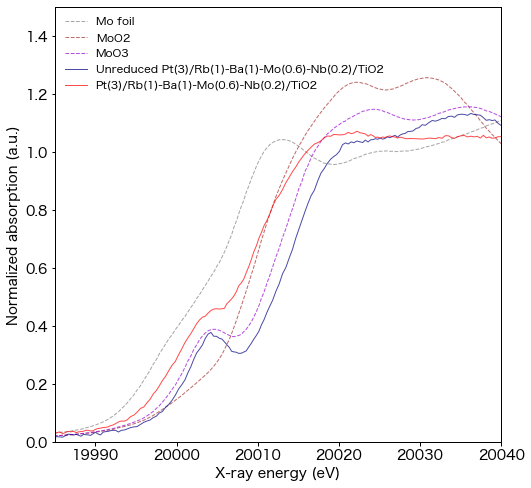

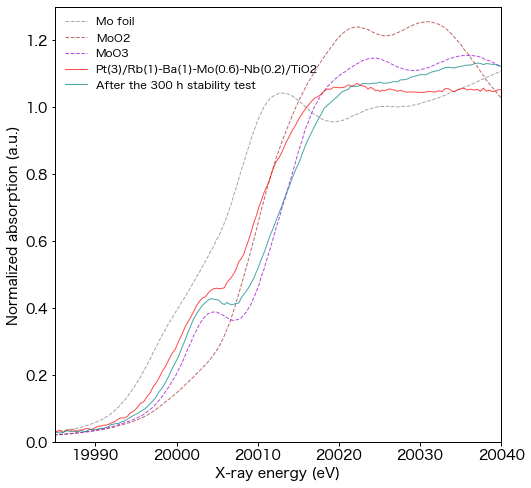

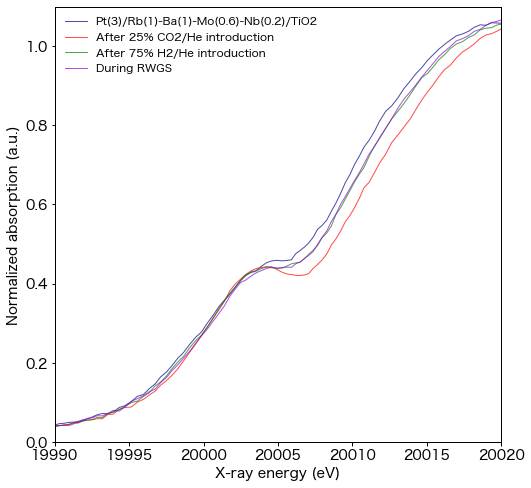

In [4]:
data = read_athena_dat_file(data_file='plot_data_python/Mo_K_in_situ_XANES_paper.nor')

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[19985, 20040], y_lim=[0, 1.5],
    plot_col_list=[2, 3, 4 ,7, 8],
    color_list=['grey', 'brown', 'darkviolet', 'navy', 'red',],
    ls_list=['dashed', 'dashed', 'dashed', 'solid', 'solid'],
    save_file_name=f'{PATH}/Mo_K_XANES_Fig1.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[19985, 20040], y_lim=[0, 1.3],
    plot_col_list=[2, 3, 4 ,8, 6],
    color_list=['grey', 'brown', 'darkviolet', 'red', 'teal'],
    ls_list=['dashed', 'dashed', 'dashed', 'solid', 'solid'],
    save_file_name=f'{PATH}/Mo_K_XANES_Fig2.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[19990, 20020], y_lim=[0, 1.1],
    plot_col_list=[8, 9, 10, 11],
    color_list=['navy', 'red', 'green', 'darkviolet'],
    ls_list=['solid', 'solid', 'solid', 'solid'],
    save_file_name=f'{PATH}/Mo_K_XANES_Fig3.png'
    )

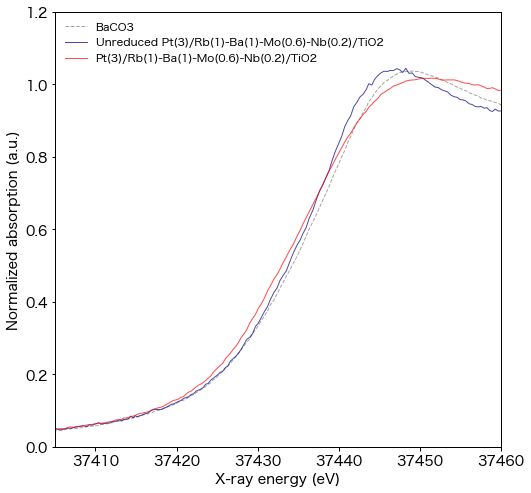

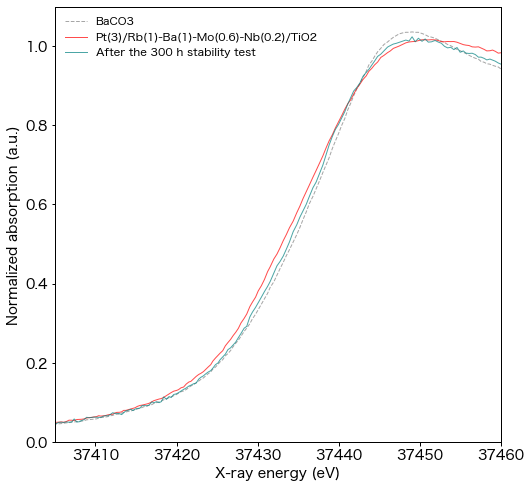

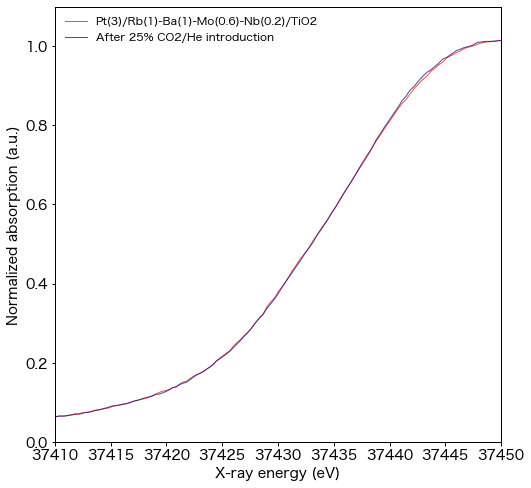

In [52]:
data = read_athena_dat_file(data_file='plot_data_python/Ba_K_in_situ_XANES_paper.nor')

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[37405, 37460], y_lim=[0, 1.2],
    plot_col_list=[2, 5, 6],
    color_list=['grey', 'navy', 'red'],
    ls_list=['dashed', 'solid', 'solid'],
    save_file_name=f'{PATH}/Ba_K_XANES_Fig1.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[37405, 37460], y_lim=[0, 1.1],
    plot_col_list=[2, 6, 4],
    color_list=['grey', 'red', 'teal'],
    ls_list=['dashed', 'solid', 'solid'],
    save_file_name=f'{PATH}/Ba_K_XANES_Fig2.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[37410, 37450], y_lim=[0, 1.1],
    plot_col_list=[6, 7],
    color_list=['red', 'navy'],
    ls_list=['solid', 'solid'],
    save_file_name=f'{PATH}/Ba_K_XANES_Fig3.png'
    )

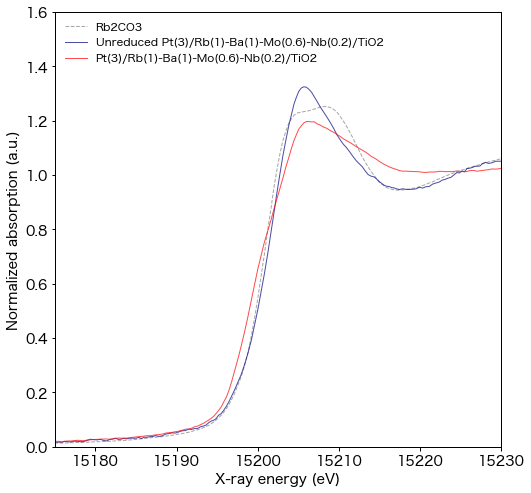

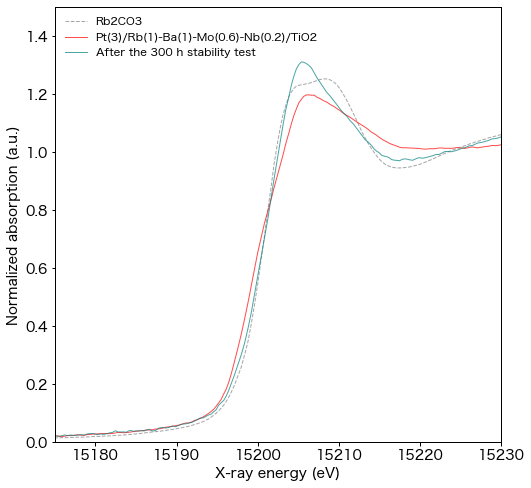

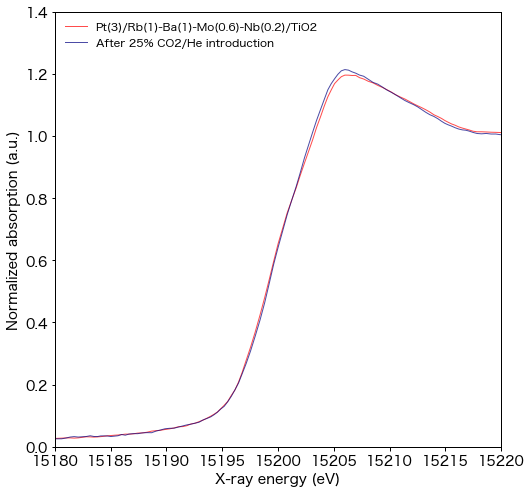

In [53]:
data = read_athena_dat_file(data_file='plot_data_python/Rb_K_in_situ_XANES_paper.nor')

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[15175, 15230], y_lim=[0, 1.6],
    plot_col_list=[2, 5, 6],
    color_list=['grey', 'navy', 'red'],
    ls_list=['dashed', 'solid', 'solid'],
    save_file_name=f'{PATH}/Rb_K_XANES_Fig1.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[15175, 15230], y_lim=[0, 1.5],
    plot_col_list=[2, 6, 4],
    color_list=['grey', 'red', 'teal'],
    ls_list=['dashed', 'solid', 'solid'],
    save_file_name=f'{PATH}/Rb_K_XANES_Fig2.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[15180, 15220], y_lim=[0, 1.4],
    plot_col_list=[6, 7],
    color_list=['red', 'navy'],
    ls_list=['solid', 'solid'],
    save_file_name=f'{PATH}/Rb_K_XANES_Fig3.png'
    )

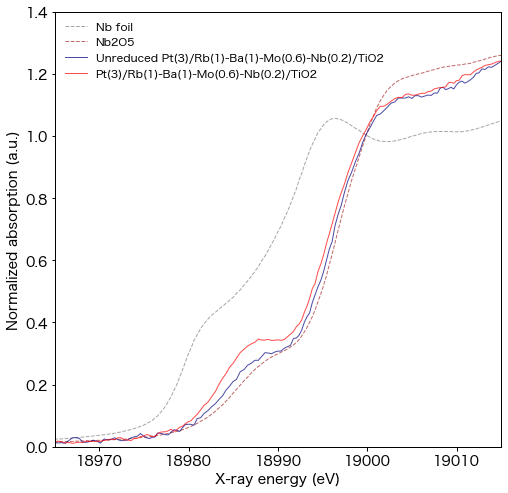

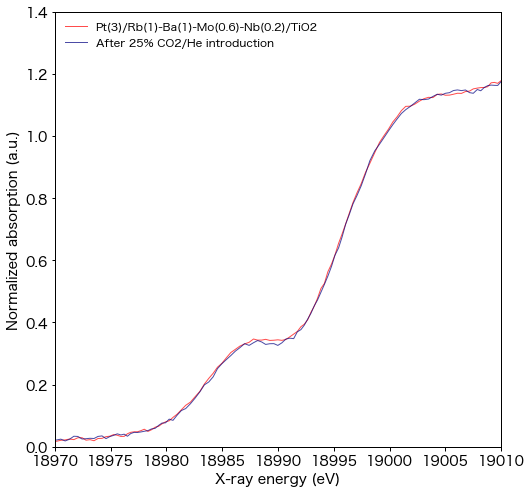

In [54]:
data = read_athena_dat_file(data_file='plot_data_python/Nb_K_in_situ_XANES_paper.nor')

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[18965, 19015], y_lim=[0, 1.4],
    plot_col_list=[2, 3, 5, 6],
    color_list=['grey', 'brown', 'navy', 'red'],
    ls_list=['dashed', 'dashed', 'solid', 'solid'],
    save_file_name=f'{PATH}/Nb_K_XANES_Fig1.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[18970, 19010], y_lim=[0, 1.4],
    plot_col_list=[6, 7],
    color_list=['red', 'navy',],
    ls_list=['solid', 'solid'],
    save_file_name=f'{PATH}/Nb_K_XANES_Fig3.png'
    )

In [4]:
data = read_athena_dat_file(data_file='plot_data_python/Nb_K_in_situ_XANES_paper_v2.nor')
data.columns

Index(['Nb foil', 'Nb2O5', 'Unreduced Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/TiO2',
       'After the 300 h stability test', 'After the 1000 h stability test',
       'Pt(3)/Rb(1)-Ba(1)-M0(0.6)-Nb(0.2)/TiO2', 'After CO2 introduction',
       'After H2 introduction', 'During RWGS'],
      dtype='object')

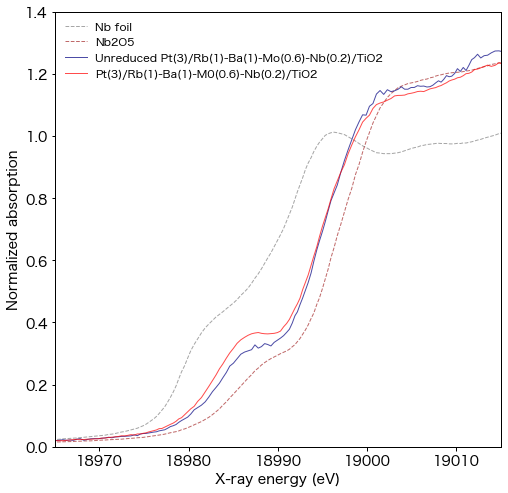

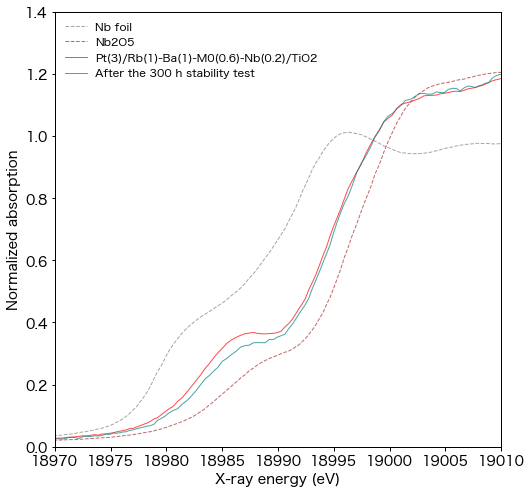

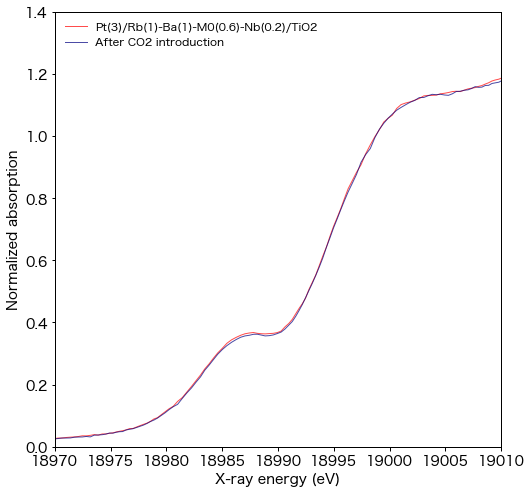

In [5]:
data = read_athena_dat_file(data_file='plot_data_python/Nb_K_in_situ_XANES_paper_v2.nor')

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[18965, 19015], y_lim=[0, 1.4],
    plot_col_list=[2, 3, 4, 7],
    color_list=['grey', 'brown', 'navy', 'red'],
    ls_list=['dashed', 'dashed', 'solid', 'solid'],
    save_file_name=f'{PATH}/Nb_K_XANES_Fig1.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[18970, 19010], y_lim=[0, 1.4],
    plot_col_list=[2, 3, 7, 5],
    color_list=['grey', 'brown', 'red', 'teal'],
    ls_list=['dashed', 'dashed', 'solid', 'solid'],
    save_file_name=f'{PATH}/Nb_K_XANES_Fig2.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[18970, 19010], y_lim=[0, 1.4],
    plot_col_list=[7, 8],
    color_list=['red', 'navy',],
    ls_list=['solid', 'solid'],
    save_file_name=f'{PATH}/Nb_K_XANES_Fig3.png'
    )

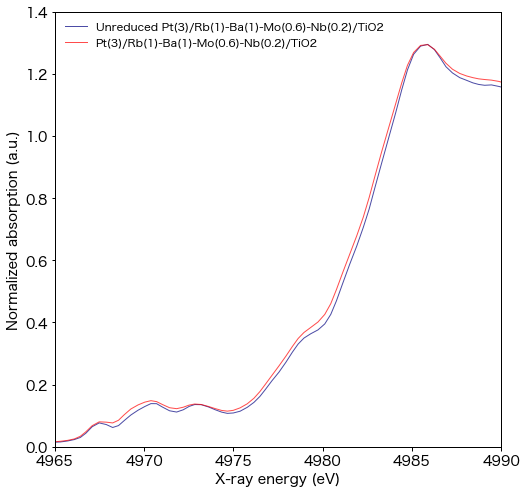

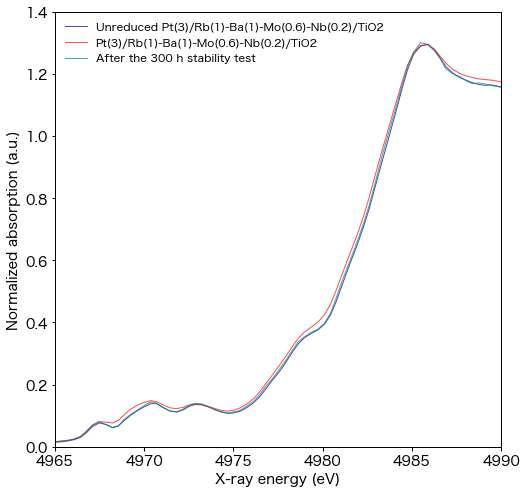

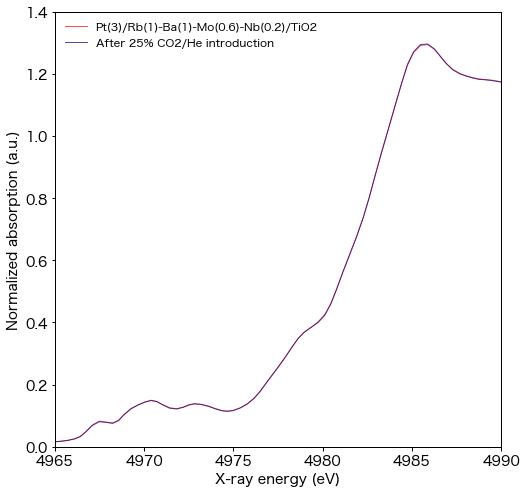

In [10]:
data = read_athena_dat_file(data_file='plot_data_python/Ti_K_in_situ_XANES_paper.nor')

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[4965, 4990], y_lim=[0, 1.4],
    plot_col_list=[8, 9],
    color_list=['navy', 'red'],
    ls_list=['solid', 'solid'],
    save_file_name=f'{PATH}/Ti_K_XANES_Fig1.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[4965, 4990], y_lim=[0, 1.4],
    plot_col_list=[8, 9, 7],
    color_list=['navy', 'red', 'teal'],
    ls_list=['solid', 'solid', 'solid'],
    save_file_name=f'{PATH}/Ti_K_XANES_Fig2.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[4965, 4990], y_lim=[0, 1.4],
    plot_col_list=[9, 10],
    color_list=['red', 'navy'],
    ls_list=['solid', 'solid'],
    save_file_name=f'{PATH}/Ti_K_XANES_Fig3.png'
    )

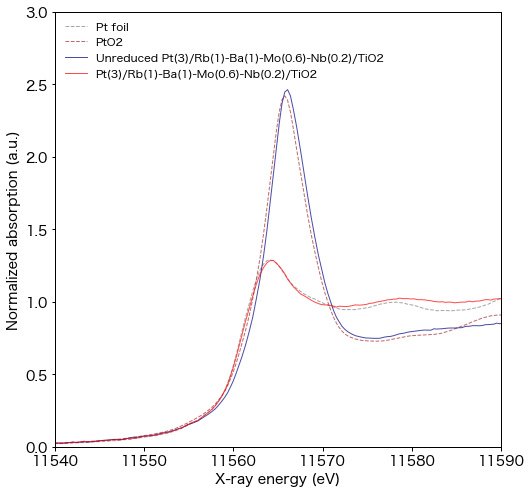

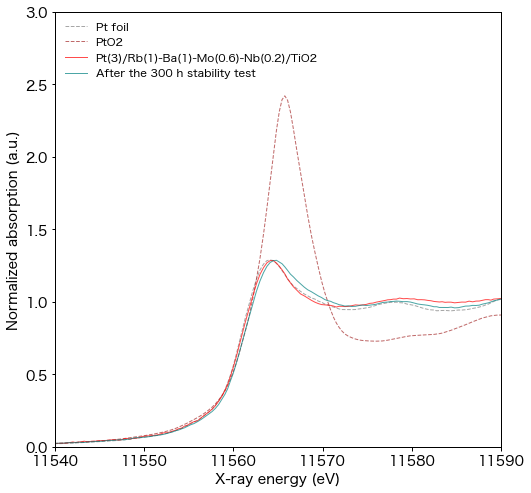

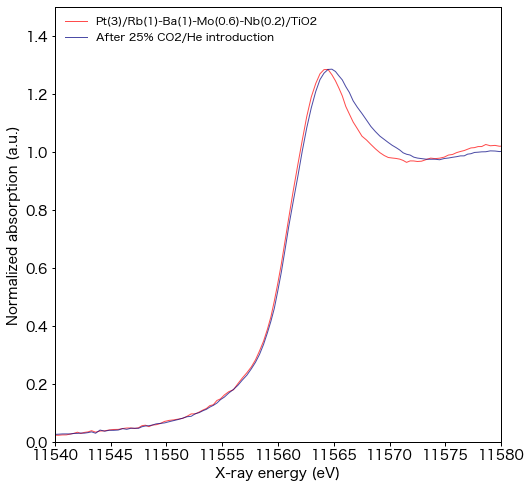

In [55]:
data = read_athena_dat_file(data_file='plot_data_python/Pt_L3_in_situ_XANES_paper.nor')

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[11540, 11590], y_lim=[0, 3],
    plot_col_list=[2, 3, 6, 7],
    color_list=['grey', 'brown','navy', 'red'],
    ls_list=['dashed','dashed','solid', 'solid'],
    save_file_name=f'{PATH}/Pt_L3_XANES_Fig1.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[11540, 11590], y_lim=[0, 3],
    plot_col_list=[2, 3, 7, 5],
    color_list=['grey', 'brown','red', 'teal'],
    ls_list=['dashed','dashed','solid', 'solid'],
    save_file_name=f'{PATH}/Pt_L3_XANES_Fig2.png'
    )

plot_XAS_spectra(
    data, plot_type='XANES',
    x_lim=[11540, 11580], y_lim=[0, 1.5],
    plot_col_list=[7, 8],
    color_list=['red', 'navy'],
    ls_list=['solid', 'solid'],
    save_file_name=f'{PATH}/Pt_L3_XANES_Fig3.png'
    )

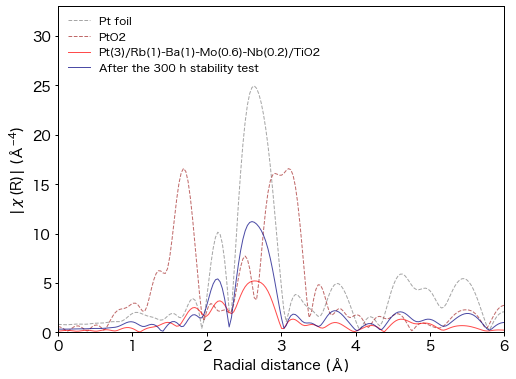

In [16]:
data = read_athena_dat_file(data_file='plot_data_python/Pt_L3_Fresh_and_Aged_FT-EXAFS.chir_mag')

plot_XAS_spectra(
    data, plot_type='FT-EXAFS',
    x_lim=[0, 6], y_lim=[0, 33],
    plot_col_list=[2, 3, 4, 5],
    color_list=['grey', 'brown','red', 'navy'],
    ls_list=['dashed','dashed','solid', 'solid'],
    save_file_name=f'{PATH}/Pt_L3_FT-EXAFS_Fig4.png'
    )

In [5]:
peak_plot = pd.read_excel('plot_data_python/Mo_K_insitu_MicroGC.xlsx', sheet_name='plot')
peak_plot

,Reaction time (min),X-ray energy at μ=0.6 (eV),Def_of_XAS_time (min),CO peak area (a.u.)
0,4.5,20008.889,1.366667,0
1,9.0,20008.889,3.833333,0
2,13.5,20008.889,6.300000,0
3,18.0,20010.122,8.766667,0
4,22.5,20010.122,11.233333,0
5,27.0,20010.122,13.700000,3013
6,31.5,20010.430,16.166667,1762
7,36.0,20009.505,18.633333,1189
8,40.5,20009.505,21.100000,909
9,45.0,20009.197,23.566667,771


In [6]:
peak_plot.iloc[:,0].dropna()

0      4.5
1      9.0
2     13.5
3     18.0
4     22.5
5     27.0
6     31.5
7     36.0
8     40.5
9     45.0
10    49.5
11    54.0
12    58.5
13    63.0
14    67.5
Name: Reaction time (min), dtype: float64

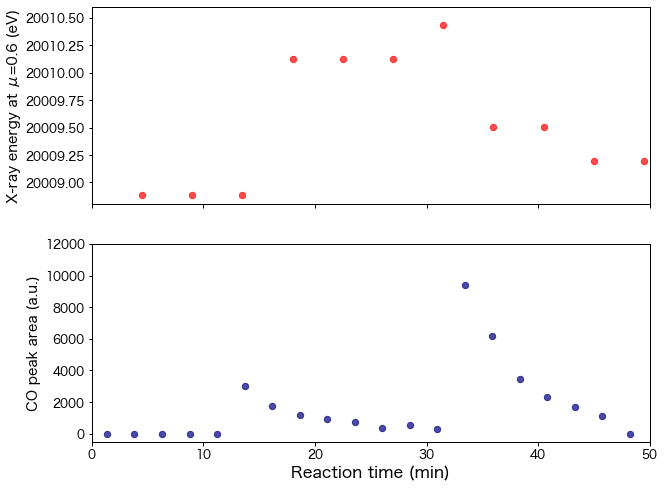

In [7]:
peak_plot = pd.read_excel('plot_data_python/Mo_K_insitu_MicroGC.xlsx', sheet_name='plot')

fig, axes = plt.subplots(2, 1, facecolor='white', sharex='col', sharey=False, figsize=(10,8))
axes[1].set_xlim(0, 50)
axes[0].set_ylim(20008.8, 20010.6)
axes[1].set_ylim(-500, 12000)
axes[1].set_xlabel('Reaction time (min)', fontsize=16)
axes[0].set_ylabel(peak_plot.iloc[:,1].name, fontsize=14)
axes[1].set_ylabel(peak_plot.iloc[:,3].name, fontsize=14)
axes[0].scatter(peak_plot.iloc[:,0].dropna(), peak_plot.iloc[:,1].dropna(), s=40, marker='o', alpha=0.7, color='red')
axes[1].scatter(peak_plot.iloc[:,2].dropna(), peak_plot.iloc[:,3].dropna(), s=40, marker='o', alpha=0.7, color='navy')
plt.savefig(f'{PATH}/Mo_K_time_peak_plot.png', dpi=300, bbox_inches='tight')

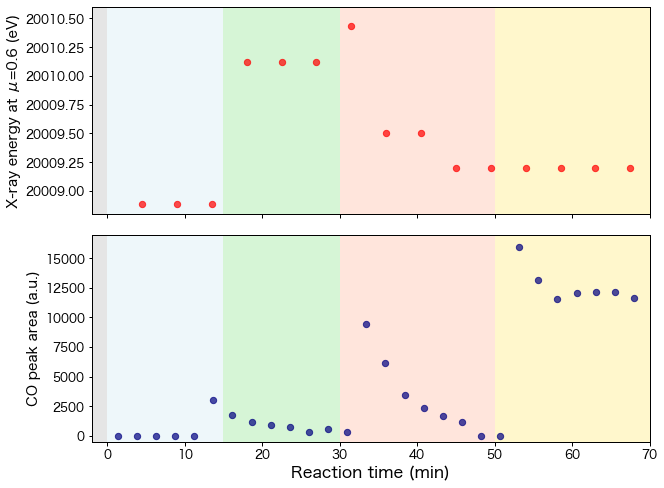

In [26]:
peak_plot = pd.read_excel('plot_data_python/Mo_K_insitu_MicroGC.xlsx', sheet_name='plot_v2')

fig, axes = plt.subplots(2, 1, facecolor='white', sharex='col', sharey=False, figsize=(10,8))
plt.subplots_adjust(hspace=0.1)

axes[1].set_xlim(-2, 70)
axes[0].set_ylim(20008.8, 20010.6)
axes[1].set_ylim(-500, 17000)
axes[1].set_xlabel('Reaction time (min)', fontsize=16)
axes[0].set_ylabel(peak_plot.iloc[:,1].name, fontsize=14)
axes[1].set_ylabel(peak_plot.iloc[:,3].name, fontsize=14)
axes[0].scatter(peak_plot.iloc[:,0].dropna(), peak_plot.iloc[:,1].dropna(), s=40, marker='o', alpha=0.7, color='red')
axes[1].scatter(peak_plot.iloc[:,2].dropna(), peak_plot.iloc[:,3].dropna(), s=40, marker='o', alpha=0.7, color='navy')
axes[1].scatter(peak_plot.iloc[:,2].dropna(), peak_plot.iloc[:,4].dropna(), s=40, marker='o', alpha=0.7, color='navy')


axes[0].axvspan(-5, 0, zorder=0, alpha=0.2, edgecolor=None, facecolor='grey') # pretreatment
axes[0].axvspan(0, 15, zorder=0, alpha=0.2, edgecolor=None, facecolor='lightblue') # He purge
axes[0].axvspan(15, 30, zorder=0, alpha=0.2, edgecolor=None, facecolor='limegreen') # CO2/He
axes[0].axvspan(30, 50, zorder=0, alpha=0.2, edgecolor=None, facecolor='coral') # H2/He
axes[0].axvspan(50, 70, zorder=0, alpha=0.2, edgecolor=None, facecolor='gold') # CO2/H2 (RWGS)

axes[1].axvspan(-5, 0, zorder=0, alpha=0.2, edgecolor=None, facecolor='grey') # pretreatment
axes[1].axvspan(0, 15, zorder=0, alpha=0.2, edgecolor=None, facecolor='lightblue') # He purge
axes[1].axvspan(15, 30, zorder=0, alpha=0.2, edgecolor=None, facecolor='limegreen') # CO2/He
axes[1].axvspan(30, 50, zorder=0, alpha=0.2, edgecolor=None, facecolor='coral') # H2/He
axes[1].axvspan(50, 70, zorder=0, alpha=0.2, edgecolor=None, facecolor='gold') # CO2/H2 (RWGS)



plt.savefig(f'{PATH}/Mo_K_time_peak_plot_v2.png', dpi=300, bbox_inches='tight')